# Idea tracker
- make a time series model but that would involve a table for each location
- 

In [1]:
#For loop tracker for preprocessing steps
'''
data=[train,test]

for df in data:
    
#Year_of_sale and house_age_group columns
    #separate the date column to month and year
    df[['Year_of_sale', 'Month']] = df['date'].str.split('-', expand=True)
    # Convert 'Year' and 'Month' columns to integers (if needed)
    df['Year_of_sale'] = df['Year_of_sale'].astype(int)

    df.drop(['block', 'street', 'Month', 'date', 'house_id'], axis=1, inplace=True)
'''

"\ndata=[train,test]\n\nfor df in data:\n    \n#Year_of_sale and house_age_group columns\n    #separate the date column to month and year\n    df[['Year_of_sale', 'Month']] = df['date'].str.split('-', expand=True)\n    # Convert 'Year' and 'Month' columns to integers (if needed)\n    df['Year_of_sale'] = df['Year_of_sale'].astype(int)\n\n    df.drop(['block', 'street', 'Month', 'date', 'house_id'], axis=1, inplace=True)\n"

###

March 26, 2024

Jose Liquet's notebook for the competition: e1010101. (2023). Simple Housing Price Prediction. Kaggle. https://kaggle.com/competitions/simple-housing-price-prediction

In [3]:
#pip install tqdm

In [4]:
#data manipulation libraries 
import numpy as np
import pandas as pd


#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import data files
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

In [6]:
train

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0
...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0


In [7]:
#check for any null and duplicated values
print(f'Null data: \n', 
      pd.isnull(train).sum(),
      f'\n \n Total duplicated data: ',
      train.duplicated().sum())

Null data: 
 house_id         0
date             0
location         0
type             0
block            0
street           0
storey_range     0
area_sqm         0
flat_model       0
commence_date    0
price            0
dtype: int64 
 
 Total duplicated data:  0


In [8]:
# make copy to make all changes here, then create for loop to modify train and test at the same time
df = train.copy()
df

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0
...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0


# 1) Exploratory Data Analysis and Feature Engineering

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   house_id       271721 non-null  int64  
 1   date           271721 non-null  object 
 2   location       271721 non-null  object 
 3   type           271721 non-null  object 
 4   block          271721 non-null  object 
 5   street         271721 non-null  object 
 6   storey_range   271721 non-null  object 
 7   area_sqm       271721 non-null  float64
 8   flat_model     271721 non-null  object 
 9   commence_date  271721 non-null  int64  
 10  price          271721 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 22.8+ MB


In [10]:
#check the value of rows
for col in df.select_dtypes('object'):
    display(df[col].value_counts().to_frame().T)

date,2010-07,2010-06,2001-10,2001-07,2009-10,2002-01,2001-06,2001-11,2000-11,2002-04,...,2006-12,2009-02,2011-02,2011-09,2011-11,2011-08,2012-02,2011-10,2011-12,2012-01
count,2715,2595,2576,2540,2531,2487,2476,2465,2445,2437,...,1399,1338,1323,1322,1282,1266,1208,1194,1139,1137


location,Honolulu,Arlington,Sacramento,Seatle,Riverside,Fresno,Austin,Milwaukee,Boston,Omaha,...,Mesa,Albuquerque,Pittsburgh,Cleveland,Chicago,Oakland,Raleigh,Atlanta,Portland,Baltimore
count,26433,22519,20769,17793,17595,15546,14516,12874,12783,10234,...,7699,7643,7303,6735,5968,4902,3094,2159,1838,711


type,4 ROOM,3 ROOM,5 ROOM,EXECUTIVE,2 ROOM,1 ROOM,MULTI-GENERATION
count,104589,84422,59817,19903,2602,265,123


block,2,1,4,3,114,113,110,101,107,8,...,220C,828A,636B,274B,27B,635B,632C,677A,221B,633A
count,1277,1204,977,962,946,938,931,906,894,885,...,1,1,1,1,1,1,1,1,1,1


street,Laredo Rd,Palisades Point Cove,50th Avenue NE,Park Hollow Ln,Cleo St,Governors Row,S 229th Street,12 Oaks Ct,Waialae Avenue,Monthan Street,...,Sw 3rd St,Foxhall Road NW,Groff Ct NE,Campbell St,W 80th St Cir,Holly Ter S,Wade Pl,Lullwater Park Way,Marvin Place,Dakota Rd
count,4569,3903,3608,3383,2735,2181,2142,2117,2021,1955,...,12,9,9,7,5,3,3,1,1,1


storey_range,04 TO 06,07 TO 09,01 TO 03,10 TO 12,13 TO 15,16 TO 18,19 TO 21,22 TO 24,25 TO 27,28 TO 30,31 TO 33,34 TO 36,37 TO 39,40 TO 42
count,69763,62342,56559,52243,18037,6722,3045,1844,789,311,24,18,16,8


flat_model,G,D,K,N,L,O,C,F,I,B,H,P,J,M,E,A
count,78017,73629,52787,16515,13435,12456,11195,7279,4965,568,442,221,123,47,30,12


### Columns
- house_id - ID variable
- date - date of sale
- location - location of house
- type - type of house, can be "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM" or "EXECUTIVE".
- block - the block that the house resides on
- street - the street that the house resides on
- storey_range - which stories are occupied by the house
- flat_model - model of the flat, different letters represent different layouts, room architecture, etc.
- commence_date - when the house was put up for sale (first_time)
- price - target variable, indicates the price the house was sold for

### To Do:
- a) see if we need block and street data
- b) see what to do with date: use month? use only year?
- c) convert dates to datetime dtype
- d) make new column for age_of_house = (date - commence_date)
- e) simplify storey_range
- f) simplify flat_model

### a) see if we need block and street data

Researched and I think this will add more complexity than anything. I will drop them.

### b) see what to do with date: use month? use only year?

In [11]:
#separate the date column to month and year
df[['Year_of_sale', 'Month']] = df['date'].str.split('-', expand=True)
# Convert 'Year' and 'Month' columns to integers (if needed)
df['Year_of_sale'] = df['Year_of_sale'].astype(int)
df['Month'] = df['Month'].astype(int)


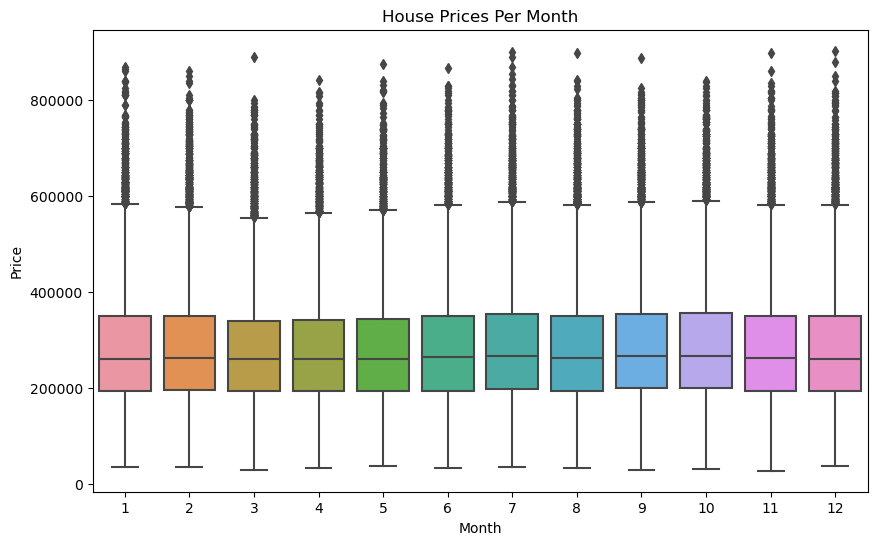

In [12]:
# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='price', data=df)
plt.title('House Prices Per Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

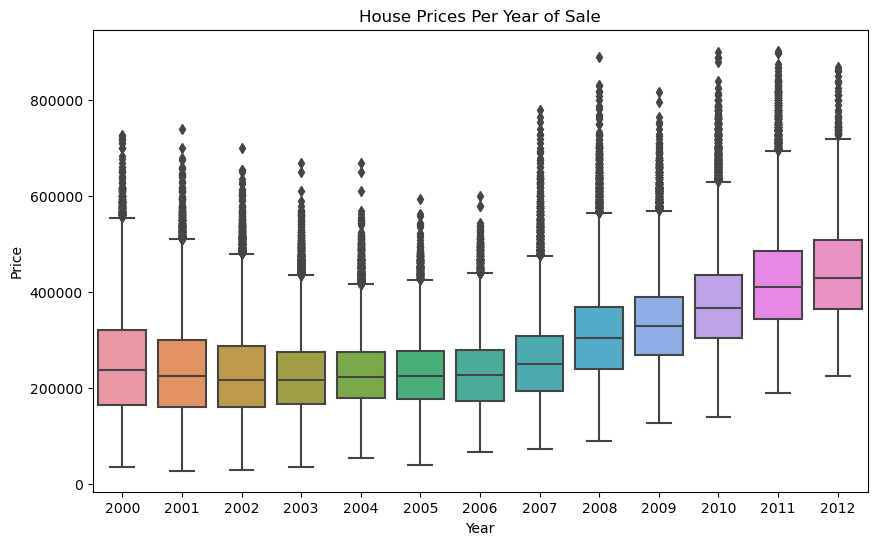

In [13]:
# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year_of_sale', y='price', data=df)
plt.title('House Prices Per Year of Sale')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Price almost does not vary by month, but it does vary by year. I will drop month and keep year. Also will make a new column for age of house which comes from year of sale and commence date(first sale).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   house_id       271721 non-null  int64  
 1   date           271721 non-null  object 
 2   location       271721 non-null  object 
 3   type           271721 non-null  object 
 4   block          271721 non-null  object 
 5   street         271721 non-null  object 
 6   storey_range   271721 non-null  object 
 7   area_sqm       271721 non-null  float64
 8   flat_model     271721 non-null  object 
 9   commence_date  271721 non-null  int64  
 10  price          271721 non-null  float64
 11  Year_of_sale   271721 non-null  int64  
 12  Month          271721 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 26.9+ MB


### To Do:
- ~a) see if we need block and street data~
- ~b) see what to do with date: use month? use only year?~
- ~c) convert dates to datetime dtype~ (Do not need to do this)
- d) make new column for age_of_house = (date - commence_date)
- e) simplify storey_range
- f) simplify flat_model
- drop tracker: df.drop(['block', 'street', 'Month', 'date'], axis=1, inplace=True)

### d) make new column for age_of_house = (date - commence_date)

In [15]:
df['house_age'] = (df['Year_of_sale'] - df['commence_date']).clip(lower=1) # the lowest value is 1 year old

# Print DataFrame with house_age
print(df)

        house_id     date   location       type block                  street  \
0         199577  2006-09    Raleigh     5 ROOM  107D          Agawan Court     
1         217021  2007-06     Fresno     3 ROOM   678                 Cleo St   
2         308062  2010-09     Tucson     4 ROOM     5     E Pleasant View Way   
3         212465  2007-04     Austin     4 ROOM   326          Park Hollow Ln   
4          60654  2001-10   Honolulu     4 ROOM   794       Ala Puawa Place     
...          ...      ...        ...        ...   ...                     ...   
271716    101563  2003-01      Omaha     4 ROOM   483               Sandra Ln   
271717     28297  2000-11      Omaha     5 ROOM   615                Atkin Rd   
271718    321995  2011-04     Boston     5 ROOM   390        Kempton Street     
271719    308162  2010-09     Fresno     4 ROOM   968        Magnolia Dale Dr   
271720    225691  2007-10  Milwaukee  EXECUTIVE   341  W Fond du Lac Avenue     

       storey_range  area_s

In [16]:
df['house_age'].value_counts()

house_age
4     18572
5     15172
22    10422
17    10021
6     10006
16     9989
23     9836
21     9770
24     9464
7      9327
20     9173
18     9150
15     9080
25     8923
8      8879
19     8590
13     8231
26     8031
12     7961
9      7873
14     7732
10     7276
11     7195
27     6723
28     5485
29     5033
30     4996
31     4857
32     4089
33     3616
3      3148
34     2886
35     2300
36     1843
37     1471
38     1162
39      968
40      802
41      643
42      405
43      249
2       181
44      123
1        59
45        9
Name: count, dtype: int64

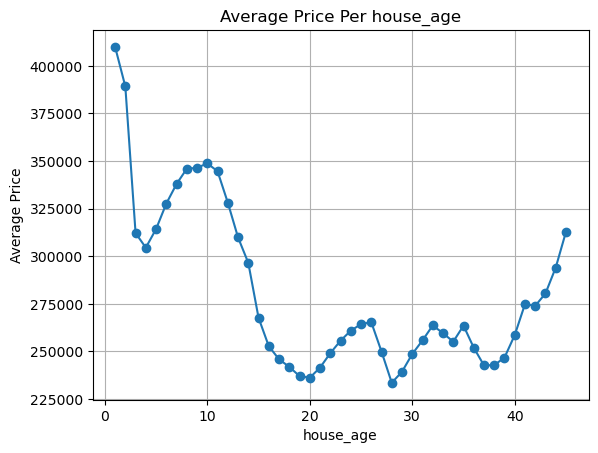

In [17]:
# Calculate average price per age of house
average_price_per_year = df.groupby('house_age')['price'].mean()

# Plot the line graph
plt.plot(average_price_per_year.index, average_price_per_year.values, marker='o', linestyle='-')
plt.title('Average Price Per house_age')
plt.xlabel('house_age')
plt.ylabel('Average Price')
plt.grid(True)
#plt.xticks(average_price_per_year.index)  # Set x ticks to be years
# Set the limit
plt.xlim()

# Show the graph
plt.show()
plt.show()

In [18]:
# create categorical variable for house age

# Define age bins and labels
age_bins = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]
age_labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30' , '31-35', '36-40', '41+']

# Create new column 'house_age_group' based on 'house_age' column
df['house_age_group'] = pd.cut(df['house_age'], bins=age_bins, labels=age_labels, right=False)

df['house_age_group'].value_counts()

house_age_group
6-10     51257
21-25    48665
16-20    46830
11-15    38395
26-30    34195
1-5      21960
31-35    20444
36-40     7744
41+       2222
Name: count, dtype: int64

### To Do:
- ~a) see if we need block and street data~
- ~b) see what to do with date: use month? use only year?~
- ~c) convert dates to datetime dtype~ (Do not need to do this)
- ~d) make new column for age_of_house = (date - commence_date)~
- e) simplify storey_range
- f) simplify flat_model
- drop tracker: df.drop(['block', 'street', 'Month', 'date'], axis=1, inplace=True) #maybe 'house_age'

### e) simplify storey_range

In [19]:
df['storey_range'].value_counts()

storey_range
04 TO 06    69763
07 TO 09    62342
01 TO 03    56559
10 TO 12    52243
13 TO 15    18037
16 TO 18     6722
19 TO 21     3045
22 TO 24     1844
25 TO 27      789
28 TO 30      311
31 TO 33       24
34 TO 36       18
37 TO 39       16
40 TO 42        8
Name: count, dtype: int64

In [20]:
# Map the desired ranges to the desired values
replace_map = {'04 TO 06': '04 TO 06',
               '07 TO 09': '07 TO 09',
               '01 TO 03': '01 TO 03',
               '10 TO 12': '10 TO 12'}

# Replace values not in the mapped ranges with '13 TO 42'
df['storey_range_group'] = df['storey_range'].replace({key: '13 TO 42' for key in df['storey_range'] if key not in replace_map})

df['storey_range_group'].value_counts()

storey_range_group
04 TO 06    69763
07 TO 09    62342
01 TO 03    56559
10 TO 12    52243
13 TO 42    30814
Name: count, dtype: int64

### To Do:
- ~a) see if we need block and street data~
- ~b) see what to do with date: use month? use only year?~
- ~c) convert dates to datetime dtype~ (Do not need to do this)
- ~d) make new column for age_of_house = (date - commence_date)~
- ~e) simplify storey_range~
- f) simplify flat_model
- drop tracker: df.drop(['block', 'street', 'Month', 'date'], axis=1, inplace=True) #maybe 'house_age'

### f) simplify flat_model

In [21]:
df['flat_model'].value_counts()

flat_model
G    78017
D    73629
K    52787
N    16515
L    13435
O    12456
C    11195
F     7279
I     4965
B      568
H      442
P      221
J      123
M       47
E       30
A       12
Name: count, dtype: int64

Will leave like this

### To Do:
- ~a) see if we need block and street data~
- ~b) see what to do with date: use month? use only year?~
- ~c) convert dates to datetime dtype~ (Do not need to do this)
- ~d) make new column for age_of_house = (date - commence_date)~
- ~e) simplify storey_range~
- ~f) simplify flat_model~
- drop tracker: df.drop(['block', 'street', 'Month', 'date'], axis=1, inplace=True) #maybe 'house_age'

In [22]:
df

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price,Year_of_sale,Month,house_age,house_age_group,storey_range_group
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0,2006,9,3,1-5,07 TO 09
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0,2007,6,19,16-20,07 TO 09
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0,2010,9,34,31-35,10 TO 12
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0,2007,4,30,31-35,10 TO 12
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0,2001,10,3,1-5,04 TO 06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0,2003,1,14,11-15,04 TO 06
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0,2000,11,4,1-5,10 TO 12
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0,2011,4,7,6-10,13 TO 42
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0,2010,9,11,11-15,13 TO 42


Text(0, 0.5, 'Price')

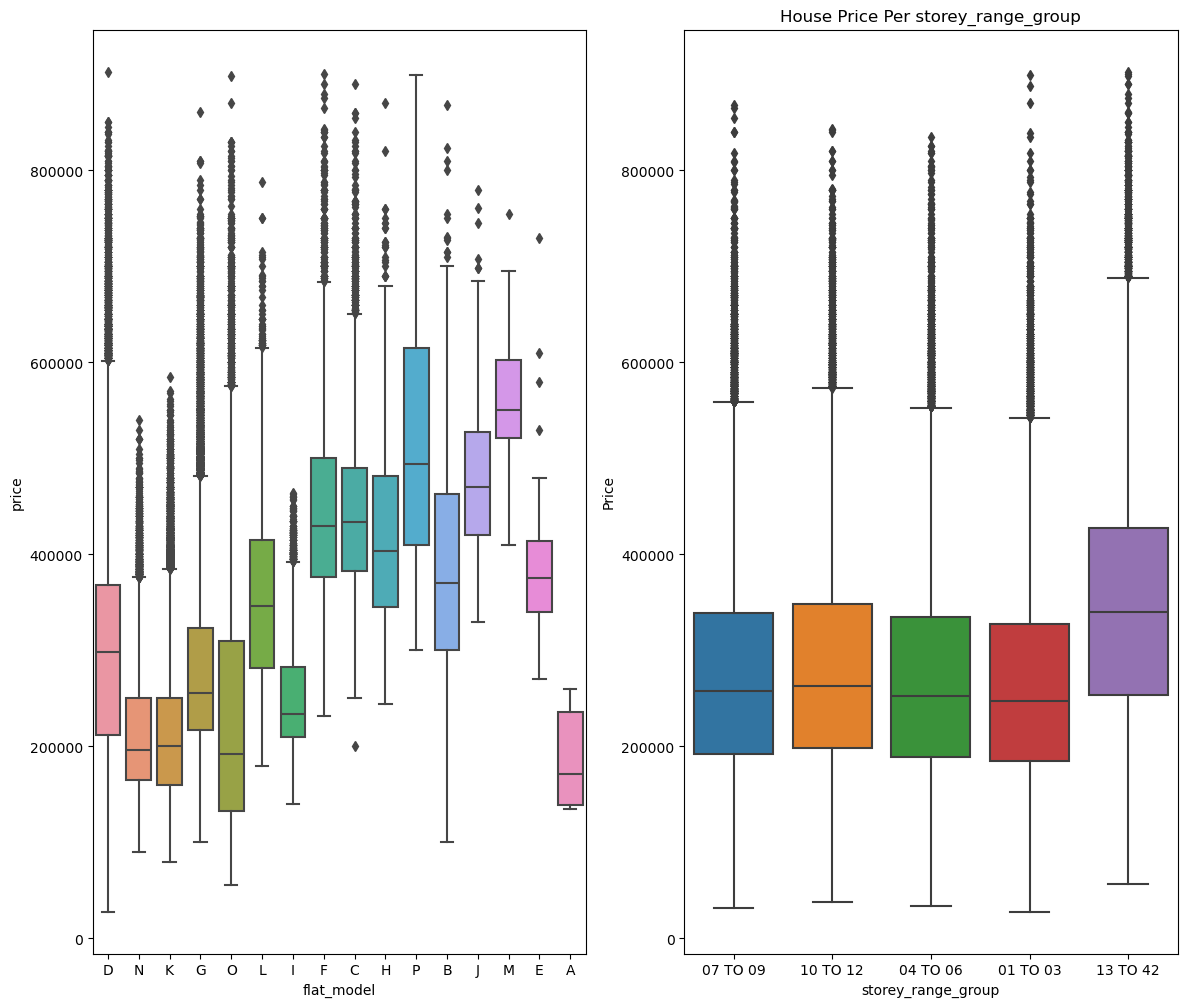

In [23]:
#side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does flat model affect price
sns.boxplot(x='flat_model', y='price', data=df, ax = maxis1)
plt.title('House Price Per flat_model')
plt.xlabel('storey_range')
plt.ylabel('Price')

#how does storey_range affect price
sns.boxplot(x='storey_range_group', y='price', data=df, ax = maxis2)
plt.title('House Price Per storey_range_group')
plt.xlabel('storey_range_group')
plt.ylabel('Price')

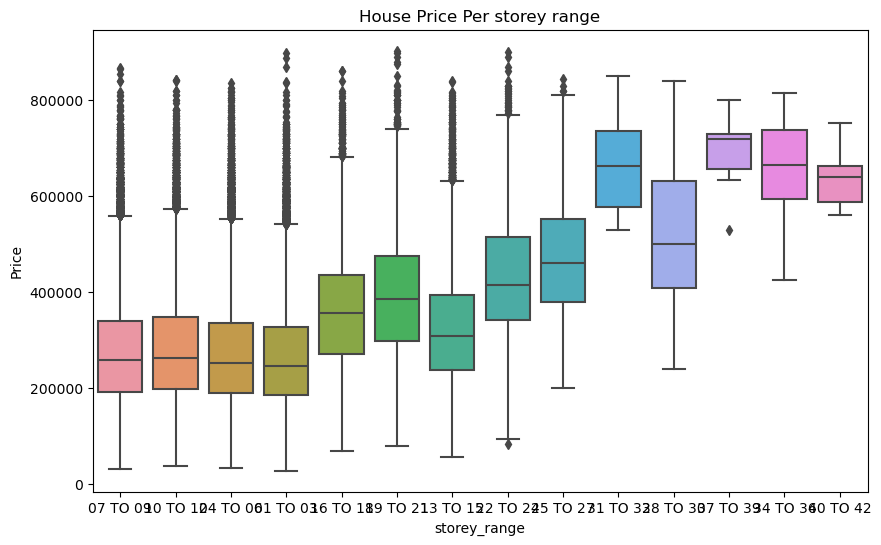

In [24]:

# Plot the boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='storey_range', y='price', data=df)
plt.title('House Price Per storey range')
plt.xlabel('storey_range')
plt.ylabel('Price')
plt.show()

Value of home is highly variable by storey group so grouping them is not a great idea, I will not group them.

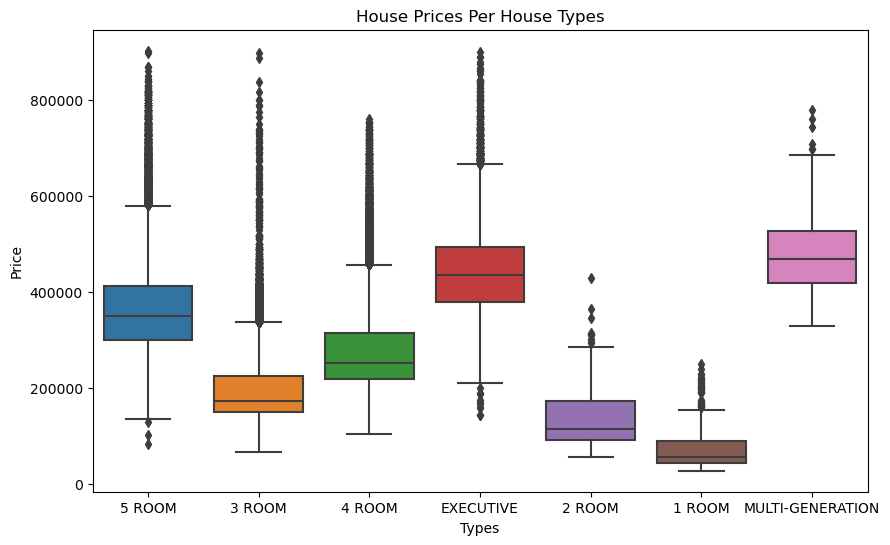

In [25]:
# Plot the boxplot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='price', data=df)
plt.title('House Prices Per House Types')
plt.xlabel('Types')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='area_sqm', ylabel='price'>

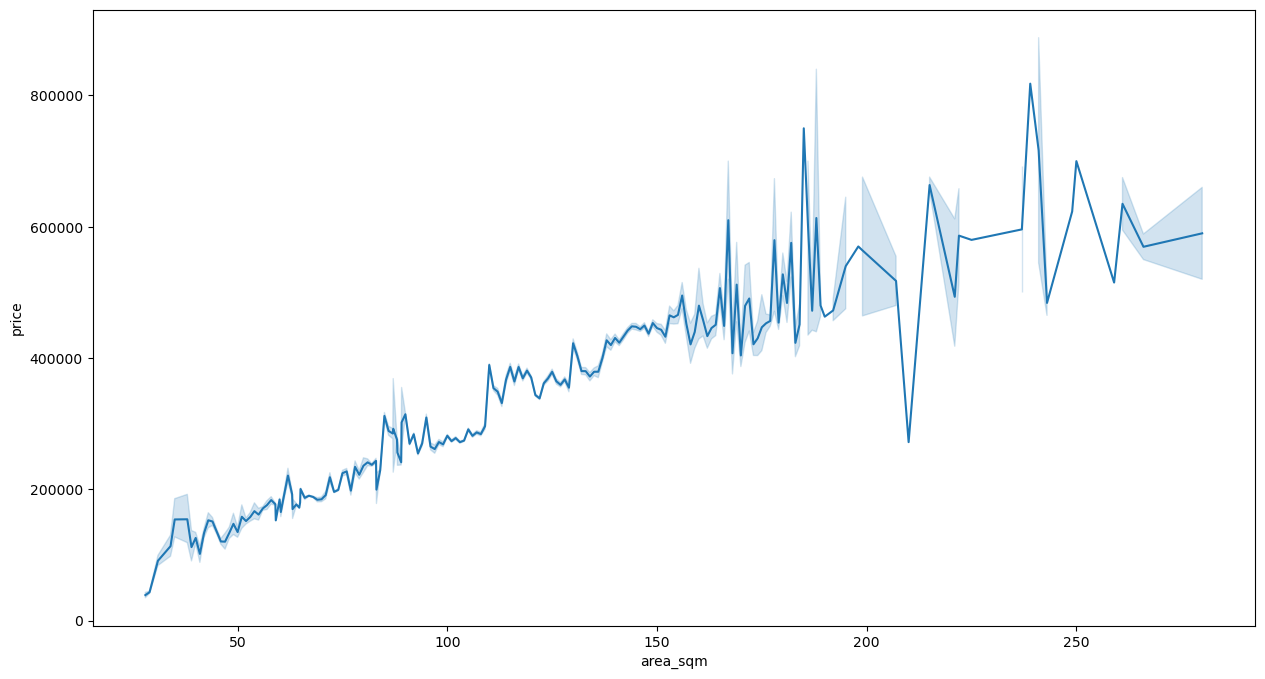

In [26]:
# area and price
plt.figure(figsize=(15,8))
sns.lineplot(x="area_sqm", y="price", data=df)

<Axes: xlabel='house_age', ylabel='price'>

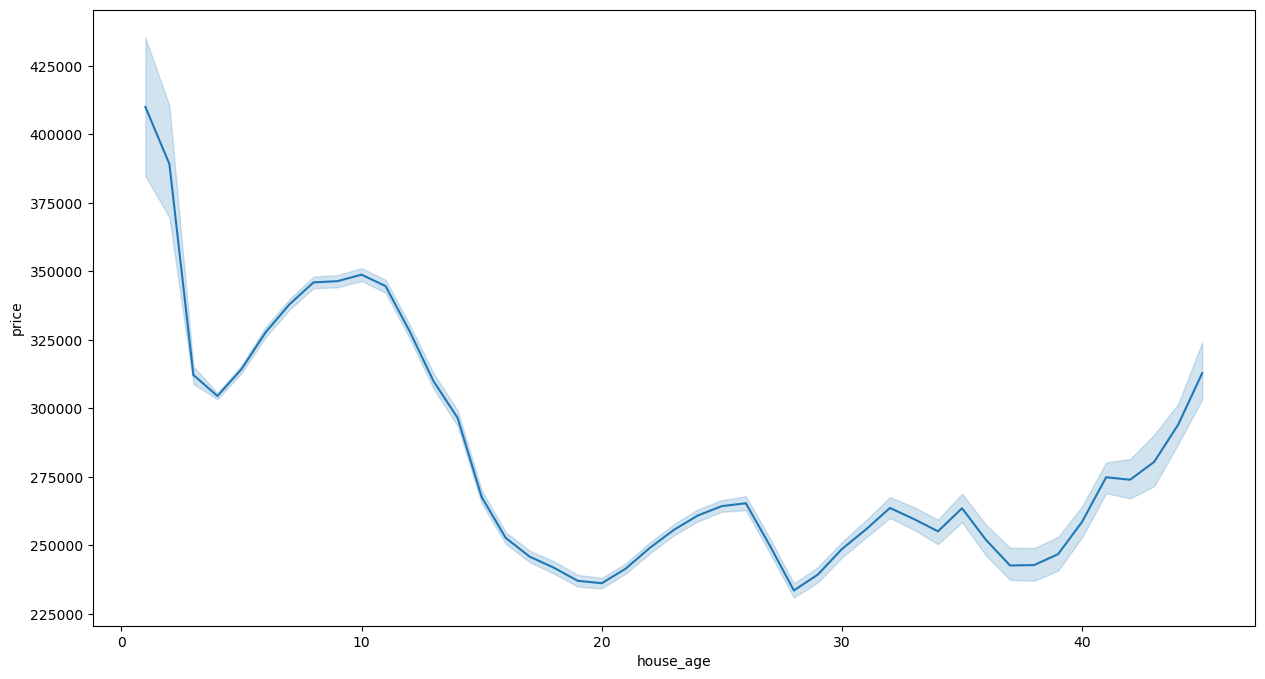

In [27]:
# age and price
plt.figure(figsize=(15,8))
sns.lineplot(x="house_age", y="price", data=df)

<Axes: xlabel='house_age', ylabel='area_sqm'>

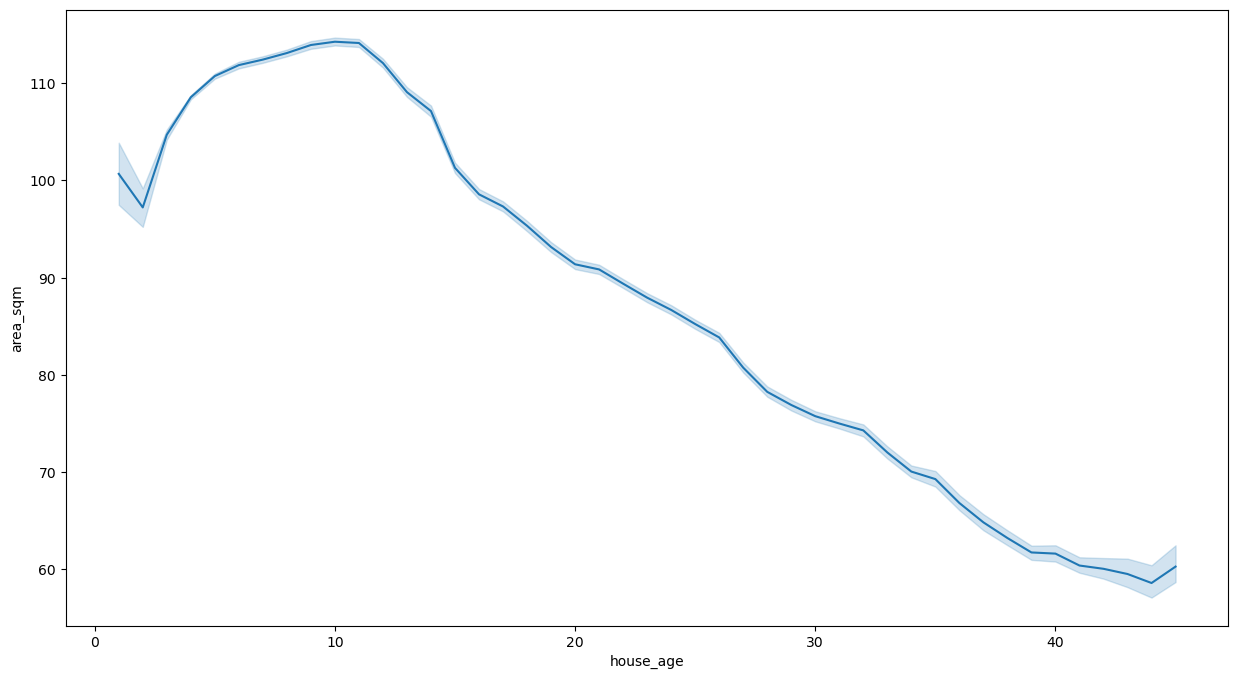

In [28]:
# age and size
plt.figure(figsize=(15,8))
sns.lineplot(x="house_age", y="area_sqm", data=df)

<Axes: xlabel='commence_date', ylabel='price'>

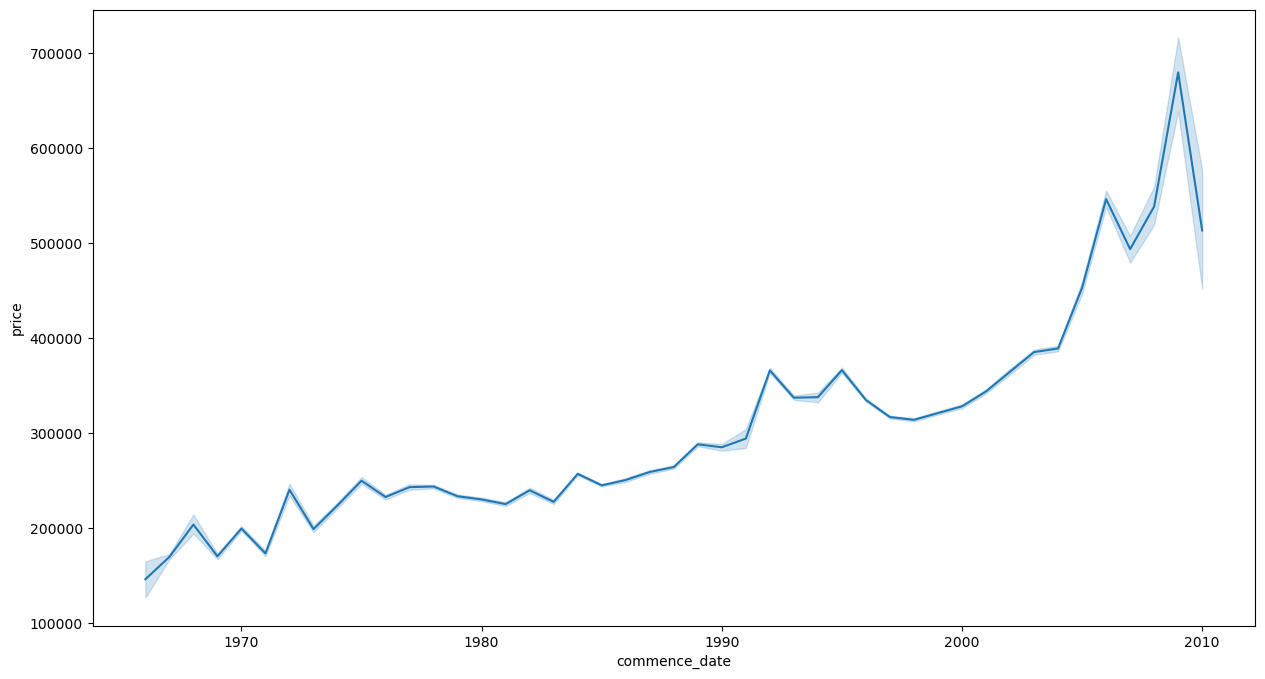

In [29]:
# commence_date and price
plt.figure(figsize=(15,8))
sns.lineplot(x="commence_date", y="price", data=df)

<Axes: xlabel='Year_of_sale', ylabel='price'>

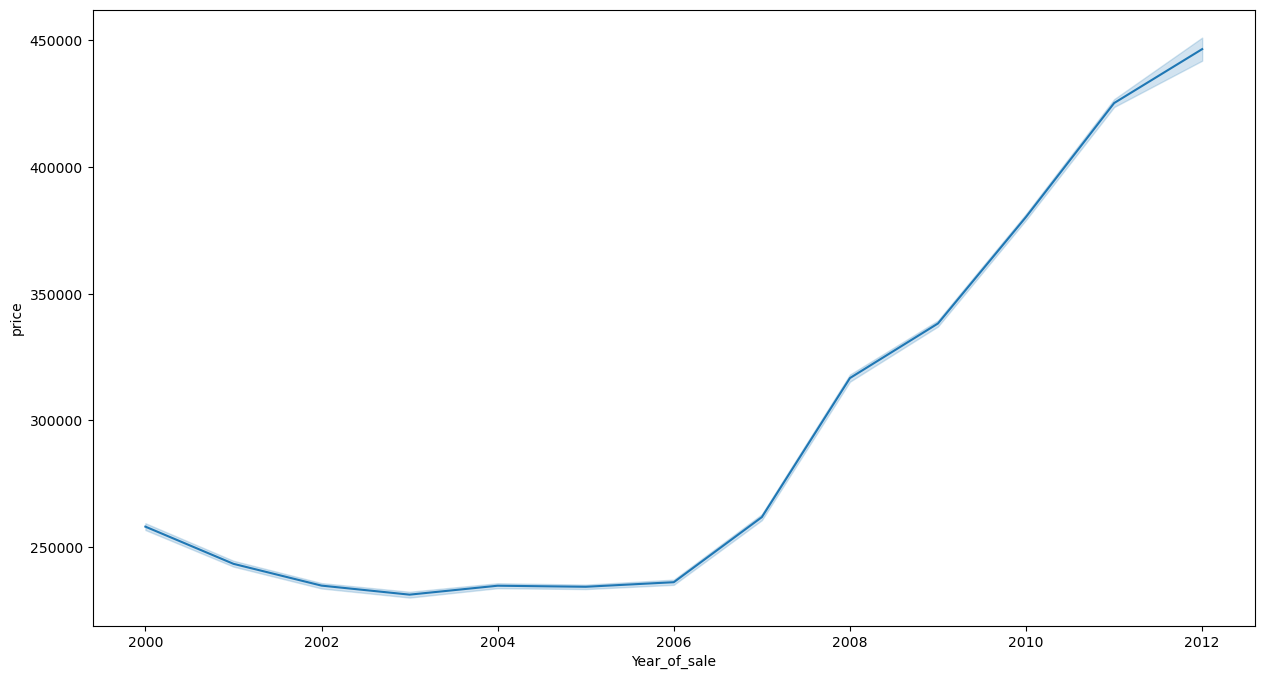

In [30]:
# year_of_sale and price
plt.figure(figsize=(15,8))
sns.lineplot(x="Year_of_sale", y="price", data=df)

# 2) Multivariate analysis

In [31]:
numerical_columns = df[['house_id','area_sqm','price', 'Year_of_sale','Month','house_age', 'commence_date' ]]

<Axes: >

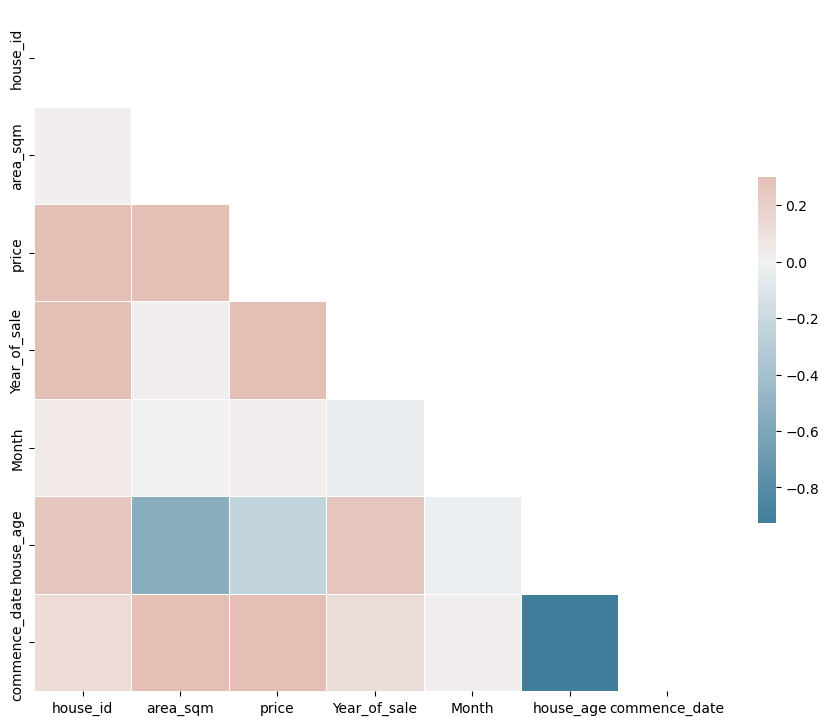

In [32]:
# Compute the correlation matrix
corr = numerical_columns.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Commence date, year of sale, and house age will be correlated. I won't use house age, nor the age-bins

# 3) Preprocessing data

In [33]:
# for loop for all data preprocessing

data=[train,test]

for df in data:
    
#Year_of_sale and house_age_group columns
    #separate the date column to month and year
    df[['Year_of_sale', 'Month']] = df['date'].str.split('-', expand=True)
    # Convert 'Year' and 'Month' columns to integers (if needed)
    df['Year_of_sale'] = df['Year_of_sale'].astype(int)

    df.drop(['block', 'street', 'Month', 'date'], axis=1, inplace=True)

In [34]:
train.drop(['house_id'], axis=1, inplace=True)

In [35]:
train.head()

,location,type,storey_range,area_sqm,flat_model,commence_date,price,Year_of_sale
0,Raleigh,5 ROOM,07 TO 09,110.0,D,2003,313000.0,2006
1,Fresno,3 ROOM,07 TO 09,64.0,N,1988,167000.0,2007
2,Tucson,4 ROOM,10 TO 12,92.0,K,1976,430000.0,2010
3,Austin,4 ROOM,10 TO 12,92.0,K,1977,303800.0,2007
4,Honolulu,4 ROOM,04 TO 06,102.0,G,1998,212000.0,2001


In [36]:
test.head()

,house_id,location,type,storey_range,area_sqm,flat_model,commence_date,Year_of_sale
0,2,Austin,3 ROOM,04 TO 06,61.0,D,1986,2000
1,5,Austin,3 ROOM,07 TO 09,67.0,K,1976,2000
2,22,Austin,3 ROOM,07 TO 09,67.0,K,1979,2000
3,23,Austin,3 ROOM,07 TO 09,67.0,K,1979,2000
4,28,Austin,3 ROOM,04 TO 06,67.0,K,1979,2000


In [37]:
#check for any null and duplicated values
print(f'Null data: \n', 
      pd.isnull(train).sum(),
      f'\n \n Total duplicated data: ',
      train.duplicated().sum())

Null data: 
 location         0
type             0
storey_range     0
area_sqm         0
flat_model       0
commence_date    0
price            0
Year_of_sale     0
dtype: int64 
 
 Total duplicated data:  15406


In [38]:
#check for any null and duplicated values
print(f'Null data: \n', 
      pd.isnull(test).sum(),
      f'\n \n Total duplicated data: ',
      test.duplicated().sum())

Null data: 
 house_id         0
location         0
type             0
storey_range     0
area_sqm         0
flat_model       0
commence_date    0
Year_of_sale     0
dtype: int64 
 
 Total duplicated data:  0


### Encode

In [39]:
# for handel the category columns we will used one hot encoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler

In [40]:
# OHE function
def ohe_encoder(data):
    df=data.copy()
    ohe_cols=[col for col in df if df[col].dtype in ['object','category']]
    ohe=OneHotEncoder(drop='first',sparse_output=False)
    ohe_encoder=ohe.fit_transform(df[ohe_cols])
    df_ohe_encoded=pd.DataFrame(ohe_encoder,columns=ohe.get_feature_names_out())
    df_encoded=pd.concat([df_ohe_encoded,df],axis=1)
    df_encoded.drop(ohe_cols,axis=1,inplace=True)
    return df_encoded
df_encoded=ohe_encoder(train)
df_encoded.head()

,location_Arlington,location_Atlanta,location_Austin,location_Baltimore,location_Boston,location_Chicago,location_Cleveland,location_Denver,location_Fresno,location_Honolulu,...,flat_model_K,flat_model_L,flat_model_M,flat_model_N,flat_model_O,flat_model_P,area_sqm,commence_date,price,Year_of_sale
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,110.0,2003,313000.0,2006
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,64.0,1988,167000.0,2007
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,92.0,1976,430000.0,2010
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,92.0,1977,303800.0,2007
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,102.0,1998,212000.0,2001


In [41]:
df_encoded.columns

Index(['location_Arlington', 'location_Atlanta', 'location_Austin',
       'location_Baltimore', 'location_Boston', 'location_Chicago',
       'location_Cleveland', 'location_Denver', 'location_Fresno',
       'location_Honolulu', 'location_Mesa', 'location_Miami',
       'location_Milwaukee', 'location_Minneapolis', 'location_Oakland',
       'location_Omaha', 'location_Pittsburgh', 'location_Portland',
       'location_Raleigh', 'location_Riverside', 'location_Sacramento',
       'location_Seatle', 'location_Tampa', 'location_Tucson',
       'location_Washington', 'type_2 ROOM', 'type_3 ROOM', 'type_4 ROOM',
       'type_5 ROOM', 'type_EXECUTIVE', 'type_MULTI-GENERATION',
       'storey_range_04 TO 06', 'storey_range_07 TO 09',
       'storey_range_10 TO 12', 'storey_range_13 TO 15',
       'storey_range_16 TO 18', 'storey_range_19 TO 21',
       'storey_range_22 TO 24', 'storey_range_25 TO 27',
       'storey_range_28 TO 30', 'storey_range_31 TO 33',
       'storey_range_34 TO 36', 

### Scale

In [42]:
def normalize_data(data):
  df=data.copy()
  scaler=StandardScaler()
  for col in df:
    if col != 'price':
      df[col]=scaler.fit_transform(df[[col]])
  return df
scaled_df=normalize_data(df_encoded)

In [43]:
scaled_df.head()

,location_Arlington,location_Atlanta,location_Austin,location_Baltimore,location_Boston,location_Chicago,location_Cleveland,location_Denver,location_Fresno,location_Honolulu,...,flat_model_K,flat_model_L,flat_model_M,flat_model_N,flat_model_O,flat_model_P,area_sqm,commence_date,price,Year_of_sale
0,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,0.525842,1.645683,313000.0,0.211614
1,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,4.059374,-0.328273,...,-0.491029,-0.22807,-0.013153,3.931028,-0.219188,-0.028531,-1.271887,0.001869,167000.0,0.494442
2,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,2.036541,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,-0.177617,-1.313181,430000.0,1.342926
3,-0.300607,-0.089495,4.209361,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,2.036541,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,-0.177617,-1.203594,303800.0,0.494442
4,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,3.046246,...,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,0.213194,1.097745,212000.0,-1.202525


In [44]:
x=scaled_df.drop('price',axis=1)
y=scaled_df['price']

In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 62 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   location_Arlington     271721 non-null  float64
 1   location_Atlanta       271721 non-null  float64
 2   location_Austin        271721 non-null  float64
 3   location_Baltimore     271721 non-null  float64
 4   location_Boston        271721 non-null  float64
 5   location_Chicago       271721 non-null  float64
 6   location_Cleveland     271721 non-null  float64
 7   location_Denver        271721 non-null  float64
 8   location_Fresno        271721 non-null  float64
 9   location_Honolulu      271721 non-null  float64
 10  location_Mesa          271721 non-null  float64
 11  location_Miami         271721 non-null  float64
 12  location_Milwaukee     271721 non-null  float64
 13  location_Minneapolis   271721 non-null  float64
 14  location_Oakland       271721 non-nu

In [46]:
y

0         313000.0
1         167000.0
2         430000.0
3         303800.0
4         212000.0
            ...   
271716    232000.0
271717    428000.0
271718    548888.0
271719    360000.0
271720    450000.0
Name: price, Length: 271721, dtype: float64

PCA to simplify

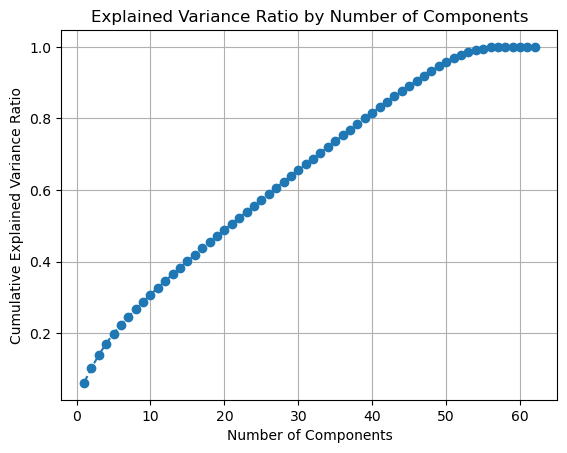

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate PCA
pca = PCA()

# Fit PCA to your data
pca.fit(x)

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


In [65]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_validate
import time
from sklearn.pipeline import Pipeline
from joblib import Parallel, delayed
from sklearn.model_selection import GridSearchCV


In [50]:
# Instantiate AdaBoostRegressor model
ada_boost_model = AdaBoostRegressor()

# Compute cross-validation score for the AdaBoostRegressor model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(ada_boost_model, x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# Print the score
print(f"AdaBoostRegressor Mean Squared Error: {mean_score} and execution time: {execution_time}")


AdaBoostRegressor Mean Squared Error: 6311501701.968749 and execution time: 181.04337692260742


In [52]:
model_df = pd.DataFrame({'model': [ada_boost_model], 'execution_time': [execution_time], 'mean_score': [mean_score], 'pca': "no"})

print(model_df)

                 model  execution_time    mean_score pca
0  AdaBoostRegressor()      181.043377  6.311502e+09  no


In [53]:
# with pca and 40 components

# Instantiate PCA and AdaBoostRegressor models
pca = PCA(n_components=40)
model = AdaBoostRegressor()

# Create a pipeline with PCA and AdaBoostRegressor
pipeline = Pipeline([('pca', pca), ('ada_boost', model)])

# Compute cross-validation score for the pipeline
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(pipeline, x, y, cv=kfold, scoring='neg_mean_squared_error')
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model': model, 'execution_time': execution_time, 'mean_score': mean_score, 'pca': "yes"}  
print(model_df)

                 model  execution_time    mean_score  pca
0  AdaBoostRegressor()      181.043377  6.311502e+09   no
1  AdaBoostRegressor()      634.496841  7.903772e+09  yes


In [54]:
# Instantiate RandomForestRegressor model
model = RandomForestRegressor()

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model': model, 'execution_time': execution_time, 'mean_score': mean_score}  

In [56]:
# Instantiate GradientBoostingRegressor  model
model = GradientBoostingRegressor()

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model': model, 'execution_time': execution_time, 'mean_score': mean_score} 
print(model_df)

                         model  execution_time    mean_score  pca
0          AdaBoostRegressor()      181.043377  6.311502e+09   no
1          AdaBoostRegressor()      634.496841  7.903772e+09  yes
2      RandomForestRegressor()      144.050104  5.543568e+08  NaN
3  GradientBoostingRegressor()       34.149596  1.256171e+09  NaN


In [58]:
# Instantiate XGBRegressor model
model = XGBRegressor()

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model': model, 'execution_time': execution_time, 'mean_score': mean_score}  
print(model_df)

                                               model  execution_time  \
0                                AdaBoostRegressor()      181.043377   
1                                AdaBoostRegressor()      634.496841   
2                            RandomForestRegressor()      144.050104   
3                        GradientBoostingRegressor()       34.149596   
4  XGBRegressor(base_score=None, booster=None, ca...        4.354502   

     mean_score  pca  
0  6.311502e+09   no  
1  7.903772e+09  yes  
2  5.543568e+08  NaN  
3  1.256171e+09  NaN  
4  5.630481e+08  NaN  


In [59]:
# Instantiate LinearRegression model
model = LinearRegression()

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model': model, 'execution_time': execution_time, 'mean_score': mean_score}  
print(model_df)

                                               model  execution_time  \
0                                AdaBoostRegressor()      181.043377   
1                                AdaBoostRegressor()      634.496841   
2                            RandomForestRegressor()      144.050104   
3                        GradientBoostingRegressor()       34.149596   
4  XGBRegressor(base_score=None, booster=None, ca...        4.354502   
5                                 LinearRegression()        1.953976   

     mean_score  pca  
0  6.311502e+09   no  
1  7.903772e+09  yes  
2  5.543568e+08  NaN  
3  1.256171e+09  NaN  
4  5.630481e+08  NaN  
5  2.465405e+09  NaN  


In [60]:
# Instantiate KNeighborsRegressor model
model = KNeighborsRegressor()

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model': model, 'execution_time': execution_time, 'mean_score': mean_score}  
print(model_df)

                                               model  execution_time  \
0                                AdaBoostRegressor()      181.043377   
1                                AdaBoostRegressor()      634.496841   
2                            RandomForestRegressor()      144.050104   
3                        GradientBoostingRegressor()       34.149596   
4  XGBRegressor(base_score=None, booster=None, ca...        4.354502   
5                                 LinearRegression()        1.953976   
6                              KNeighborsRegressor()       50.445648   

     mean_score  pca  
0  6.311502e+09   no  
1  7.903772e+09  yes  
2  5.543568e+08  NaN  
3  1.256171e+09  NaN  
4  5.630481e+08  NaN  
5  2.465405e+09  NaN  
6  7.273811e+08  NaN  


In [61]:
from sklearn.neural_network import MLPRegressor

# Instantiate MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100,),  # Specify the number of hidden layers and units
                     activation='relu',  # Activation function for hidden layers
                     solver='adam',  # Solver algorithm for optimization
                     alpha=0.0001,  # Regularization parameter
                     batch_size='auto',  # Size of mini-batches for optimization
                     learning_rate='constant',  # Learning rate schedule for weight updates
                     learning_rate_init=0.001,  # Initial learning rate
                     max_iter=200,  # Maximum number of iterations
                     random_state=42)  # Random seed for reproducibility

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model': model, 'execution_time': execution_time, 'mean_score': mean_score}  
print(model_df)

/Users/joseliquet/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joseliquet/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joseliquet/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joseliquet/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joselique

                                               model  execution_time  \
0                                AdaBoostRegressor()      181.043377   
1                                AdaBoostRegressor()      634.496841   
2                            RandomForestRegressor()      144.050104   
3                        GradientBoostingRegressor()       34.149596   
4  XGBRegressor(base_score=None, booster=None, ca...        4.354502   
5                                 LinearRegression()        1.953976   
6                              KNeighborsRegressor()       50.445648   
7                      MLPRegressor(random_state=42)      147.899212   

     mean_score  pca  
0  6.311502e+09   no  
1  7.903772e+09  yes  
2  5.543568e+08  NaN  
3  1.256171e+09  NaN  
4  5.630481e+08  NaN  
5  2.465405e+09  NaN  
6  7.273811e+08  NaN  
7  9.054125e+08  NaN  


In [64]:
model_df.sort_values('mean_score')

,model,execution_time,mean_score,pca
2,RandomForestRegressor(),144.050104,5.543568e+08,NaN
4,"XGBRegressor(base_score=None, booster=None, ca...",4.354502,5.630481e+08,NaN
6,KNeighborsRegressor(),50.445648,7.273811e+08,NaN
7,MLPRegressor(random_state=42),147.899212,9.054125e+08,NaN
3,GradientBoostingRegressor(),34.149596,1.256171e+09,NaN
5,LinearRegression(),1.953976,2.465405e+09,NaN
0,AdaBoostRegressor(),181.043377,6.311502e+09,no
1,AdaBoostRegressor(),634.496841,7.903772e+09,yes


### Let's explore XGBoost, then Random Forest because I know RF takes lots of time to optimize

# XGBOOST

In [66]:
g_boost_param={
    'loss':['squared_error', 'absolute_error' ],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[5,8,10],
    'learning_rate': [1, 2],
    'n_estimators': [100 ,300]
}
g_boost=GradientBoostingRegressor()
grid = GridSearchCV(estimator=g_boost, param_grid=g_boost_param, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid.fit(x, y)

# Print the best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'criterion': 'squared_error', 'learning_rate': 1, 'loss': 'squared_error', 'max_depth': 5, 'n_estimators': 300}
Best Score: -503421707.87006676


In [67]:
# Instantiate GradientBoostingRegressor with the best parameters
best_params = grid.best_params_
g_boost_best = GradientBoostingRegressor(**best_params)

# Fit the model with the best parameters to your data
g_boost_best.fit(x, y)  # Assuming x and y are your feature matrix and target vector

In [76]:
g_boost_best.score(x,y)

0.9675844956382279

In [77]:
# hyperparameterized g_boost_best

model = g_boost_best

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model':  g_boost_best, 'execution_time': execution_time, 'mean_score': mean_score}  
print(model_df)

                                               model  execution_time  \
0                                AdaBoostRegressor()      181.043377   
1                                AdaBoostRegressor()      634.496841   
2                            RandomForestRegressor()      144.050104   
3                        GradientBoostingRegressor()       34.149596   
4  XGBRegressor(base_score=None, booster=None, ca...        4.354502   
5                                 LinearRegression()        1.953976   
6                              KNeighborsRegressor()       50.445648   
7                      MLPRegressor(random_state=42)      147.899212   
8  ([DecisionTreeRegressor(max_depth=5,\n        ...      156.354942   

     mean_score  pca  
0  6.311502e+09   no  
1  7.903772e+09  yes  
2  5.543568e+08  NaN  
3  1.256171e+09  NaN  
4  5.630481e+08  NaN  
5  2.465405e+09  NaN  
6  7.273811e+08  NaN  
7  9.054125e+08  NaN  
8  4.959386e+08  NaN  


# Random Forest

In [84]:
rf_param = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [5, 8, 10],
    'n_estimators': [100, 300],
    'warm_start': [True]
    
    
}

rf = RandomForestRegressor()
grid = GridSearchCV(estimator=rf, param_grid=rf_param, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
grid.fit(x, y)

# Print the best parameters and best score
#print("Best Parameters:", grid.best_params_)
#print("Best Score:", grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [5, 8, 10], 'n_estimators': [100, 300],
                         'warm_start': [True]},
             scoring='neg_mean_squared_error', verbose=1)

In [85]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 10, 'n_estimators': 300, 'warm_start': True}
Best Score: -1457150758.8167284


In [86]:
# Instantiate RandomForestRegressor with the best parameters
best_params = grid.best_params_
rf_best = RandomForestRegressor(**best_params)

# Fit the model with the best parameters to your data
rf_best.fit(x, y)  # Assuming x and y are your feature matrix and target vector

RandomForestRegressor(criterion='friedman_mse', max_depth=10, n_estimators=300,
                      warm_start=True)

In [88]:
rf_best.score(x,y)

0.8860019504752159

In [87]:
# hyperparameterized rf_best

model = rf_best

# Compute cross-validation score for the model
start_time = time.time()

kfold = KFold(n_splits=10, random_state=44, shuffle=True)
cv_score = cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error', n_jobs= -1)
mean_score = -cv_score.mean()  # Convert negative MSE back to positive

# Record the execution time
execution_time = time.time() - start_time

# append the score
model_df.loc[len(model_df.index)] = {'model':  rf_best, 'execution_time': execution_time, 'mean_score': mean_score}  
print(model_df)

                                               model  execution_time  \
0                                AdaBoostRegressor()      181.043377   
1                                AdaBoostRegressor()      634.496841   
2                            RandomForestRegressor()      144.050104   
3                        GradientBoostingRegressor()       34.149596   
4  XGBRegressor(base_score=None, booster=None, ca...        4.354502   
5                                 LinearRegression()        1.953976   
6                              KNeighborsRegressor()       50.445648   
7                      MLPRegressor(random_state=42)      147.899212   
8  ([DecisionTreeRegressor(max_depth=5,\n        ...      156.354942   
9  (DecisionTreeRegressor(criterion='friedman_mse...      212.617101   

     mean_score  pca  
0  6.311502e+09   no  
1  7.903772e+09  yes  
2  5.543568e+08  NaN  
3  1.256171e+09  NaN  
4  5.630481e+08  NaN  
5  2.465405e+09  NaN  
6  7.273811e+08  NaN  
7  9.054125e+08  NaN  


# Will use XGBoost: g_boost_best

Feature ranking:
1. Feature 59 (0.5462003689836534)
2. Feature 61 (0.30315946703694097)
3. Feature 60 (0.03032908668975123)
4. Feature 24 (0.018906409022678095)
5. Feature 9 (0.010294240935286622)
6. Feature 5 (0.008139929556071472)
7. Feature 20 (0.00771330099883926)
8. Feature 19 (0.005805517785919177)
9. Feature 11 (0.004860532576590703)
10. Feature 7 (0.00484851485047077)
11. Feature 12 (0.004600939100395876)
12. Feature 1 (0.003828586288857372)
13. Feature 10 (0.0036008571068879215)
14. Feature 22 (0.0032071403894667378)
15. Feature 27 (0.0030116811703338768)
16. Feature 14 (0.002538724633937723)
17. Feature 46 (0.0024914074301695035)
18. Feature 13 (0.00196243739077202)
19. Feature 49 (0.0019552725021320166)
20. Feature 58 (0.0019168180543276787)
21. Feature 2 (0.0018166242082761658)
22. Feature 36 (0.0018062825906988648)
23. Feature 17 (0.0017371980235056405)
24. Feature 57 (0.0016554513549029042)
25. Feature 3 (0.001416654651636766)
26. Feature 28 (0.0013773855317254725)
27. Fe

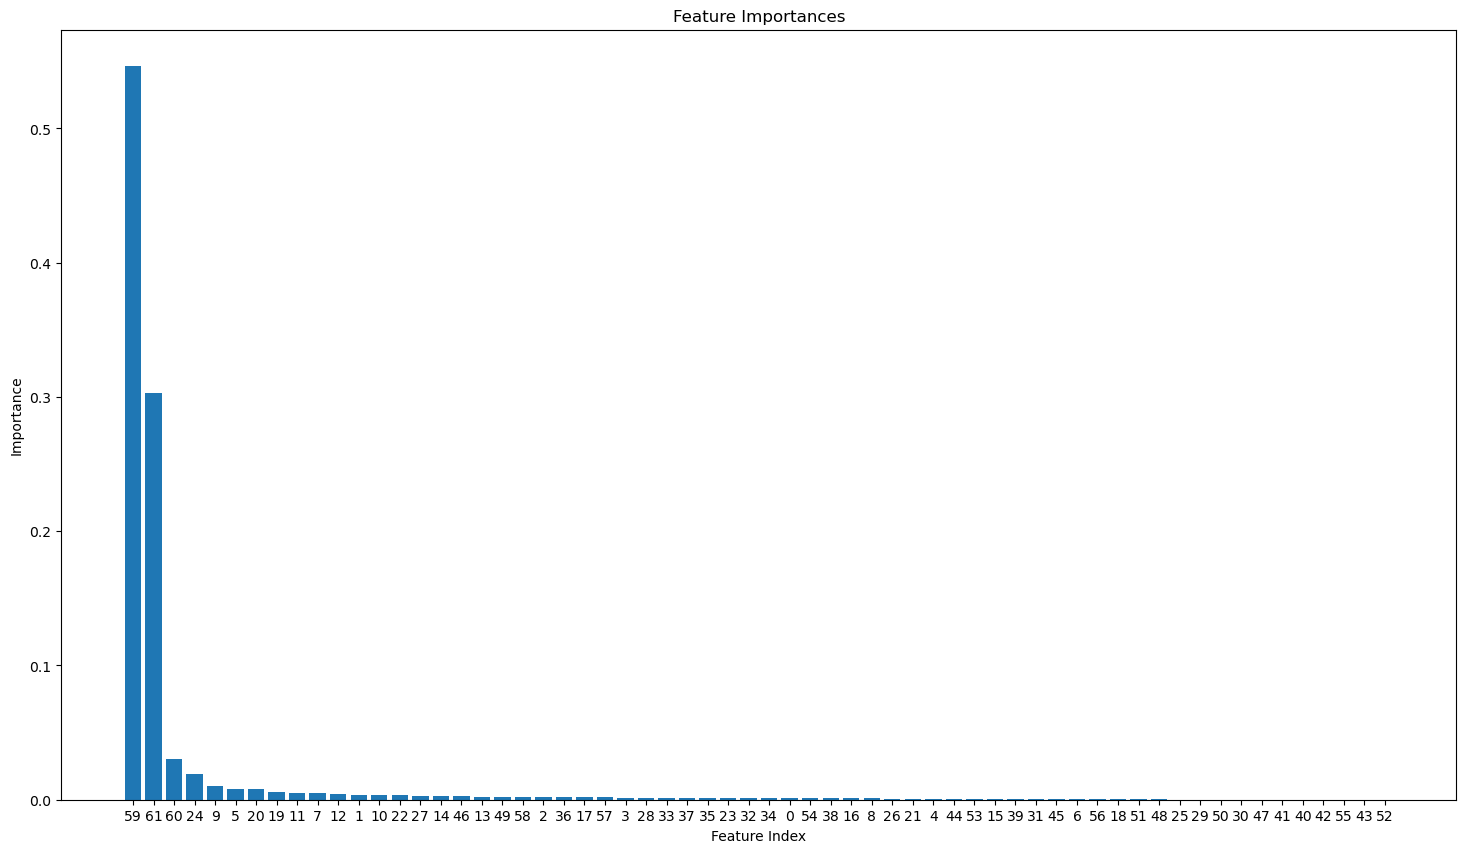

In [89]:
import matplotlib.pyplot as plt

# Get feature importances
importances = g_boost_best.feature_importances_

# Get the indices of features in descending order of importance
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(18, 10))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [115]:
x.shape

(271721, 62)

In [116]:
x

,location_Arlington,location_Atlanta,location_Austin,location_Baltimore,location_Boston,location_Chicago,location_Cleveland,location_Denver,location_Fresno,location_Honolulu,...,flat_model_J,flat_model_K,flat_model_L,flat_model_M,flat_model_N,flat_model_O,flat_model_P,area_sqm,commence_date,Year_of_sale
0,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,-0.021281,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,0.525842,1.645683,0.211614
1,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,4.059374,-0.328273,...,-0.021281,-0.491029,-0.22807,-0.013153,3.931028,-0.219188,-0.028531,-1.271887,0.001869,0.494442
2,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,-0.021281,2.036541,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,-0.177617,-1.313181,1.342926
3,-0.300607,-0.089495,4.209361,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,-0.021281,2.036541,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,-0.177617,-1.203594,0.494442
4,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,3.046246,...,-0.021281,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,0.213194,1.097745,-1.202525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271716,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,-0.021281,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,0.252275,0.111457,-0.636869
271717,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,-0.021281,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,1.463788,0.878570,-1.485353
271718,-0.300607,-0.089495,-0.237566,-0.05122,4.500715,-0.149856,-0.159425,-0.184916,-0.246343,-0.328273,...,-0.021281,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,0.838491,1.755270,1.625753
271719,-0.300607,-0.089495,-0.237566,-0.05122,-0.222187,-0.149856,-0.159425,-0.184916,4.059374,-0.328273,...,-0.021281,-0.491029,-0.22807,-0.013153,-0.254386,-0.219188,-0.028531,-0.255779,1.207332,1.342926


# Model test dataset

In [90]:
test

,house_id,location,type,storey_range,area_sqm,flat_model,commence_date,Year_of_sale
0,2,Austin,3 ROOM,04 TO 06,61.0,D,1986,2000
1,5,Austin,3 ROOM,07 TO 09,67.0,K,1976,2000
2,22,Austin,3 ROOM,07 TO 09,67.0,K,1979,2000
3,23,Austin,3 ROOM,07 TO 09,67.0,K,1979,2000
4,28,Austin,3 ROOM,04 TO 06,67.0,K,1979,2000
...,...,...,...,...,...,...,...,...
67925,339632,Riverside,4 ROOM,04 TO 06,84.0,N,1986,2012
67926,339639,Riverside,5 ROOM,04 TO 06,123.0,D,1987,2012
67927,339642,Riverside,5 ROOM,04 TO 06,127.0,D,1988,2012
67928,339643,Riverside,5 ROOM,07 TO 09,122.0,D,1988,2012


In [91]:
# OHE function
def ohe_encoder(data):
    df=data.copy()
    ohe_cols=[col for col in df if df[col].dtype in ['object','category']]
    ohe=OneHotEncoder(drop='first',sparse_output=False)
    ohe_encoder=ohe.fit_transform(df[ohe_cols])
    df_ohe_encoded=pd.DataFrame(ohe_encoder,columns=ohe.get_feature_names_out())
    df_encoded=pd.concat([df_ohe_encoded,df],axis=1)
    df_encoded.drop(ohe_cols,axis=1,inplace=True)
    return df_encoded
df_encoded_test=ohe_encoder(test)
df_encoded_test.head()

,location_Arlington,location_Atlanta,location_Austin,location_Baltimore,location_Boston,location_Chicago,location_Cleveland,location_Denver,location_Fresno,location_Honolulu,...,flat_model_K,flat_model_L,flat_model_M,flat_model_N,flat_model_O,flat_model_P,house_id,area_sqm,commence_date,Year_of_sale
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,61.0,1986,2000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,5,67.0,1976,2000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,22,67.0,1979,2000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,23,67.0,1979,2000
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,28,67.0,1979,2000


In [92]:
def normalize_data(data):
  df=data.copy()
  scaler=StandardScaler()
  for col in df:
    if col != 'house_id':
      df[col]=scaler.fit_transform(df[[col]])
  return df
scaled_df_test=normalize_data(df_encoded_test)

In [93]:
scaled_df_test

,location_Arlington,location_Atlanta,location_Austin,location_Baltimore,location_Boston,location_Chicago,location_Cleveland,location_Denver,location_Fresno,location_Honolulu,...,flat_model_K,flat_model_L,flat_model_M,flat_model_N,flat_model_O,flat_model_P,house_id,area_sqm,commence_date,Year_of_sale
0,-0.301284,-0.09043,4.251600,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,-0.489118,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,2,-1.393042,-0.215205,-1.485450
1,-0.301284,-0.09043,4.251600,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,2.044495,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,5,-1.158401,-1.312320,-1.485450
2,-0.301284,-0.09043,4.251600,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,2.044495,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,22,-1.158401,-0.983185,-1.485450
3,-0.301284,-0.09043,4.251600,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,2.044495,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,23,-1.158401,-0.983185,-1.485450
4,-0.301284,-0.09043,4.251600,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,2.044495,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,28,-1.158401,-0.983185,-1.485450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67925,-0.301284,-0.09043,-0.235206,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,-0.489118,-0.228543,-0.013835,3.980919,-0.218006,-0.024873,339632,-0.493585,-0.215205,1.904622
67926,-0.301284,-0.09043,-0.235206,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,-0.489118,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,339639,1.031583,-0.105493,1.904622
67927,-0.301284,-0.09043,-0.235206,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,-0.489118,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,339642,1.188010,0.004219,1.904622
67928,-0.301284,-0.09043,-0.235206,-0.049194,-0.224014,-0.147321,-0.155511,-0.188295,-0.247032,-0.328569,...,-0.489118,-0.228543,-0.013835,-0.251198,-0.218006,-0.024873,339643,0.992476,0.004219,1.904622


In [94]:
# make output file

#set ids as house_id and predict price 
ids = scaled_df_test['house_id']
predictions = g_boost_best.predict(scaled_df_test.drop('house_id', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'house_id' : ids, 'price': predictions.astype(int) })
output.to_csv('submission3.csv', index=False)

In [95]:
output

,house_id,price
0,2,127593
1,5,152100
2,22,160710
3,23,160710
4,28,158875
...,...,...
67925,339632,364207
67926,339639,486733
67927,339642,494332
67928,339643,477712


MSE = 15819.60308